In [1]:
#import libraries
import numpy as np #helps in wokring with arrays and matrics
import pandas as pd #helps in reading dataset/making dataframes/manipulating dataframes
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
df=pd.read_csv('netflix2.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [14]:
df.shape

(8790, 10)

In [20]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6202 non-null   object
 4   country       8503 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [17]:
df.isna().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [21]:
df['date_added']=pd.to_datetime(df['date_added']) #covert datatype from object to date time64


In [22]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [23]:
df.isna()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,True,False,False,False,False,False,False
8786,False,False,False,True,False,False,False,False,False,False
8787,False,False,False,True,False,False,False,False,False,False
8788,False,False,False,True,False,False,False,False,False,False


In [25]:
df.fillna({'director':'unavailable','country':'unavailable'},inplace=True)#filling missing values
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

VISUALIZATION

In [27]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Text(0.5, 1.0, 'count vs type of shows')

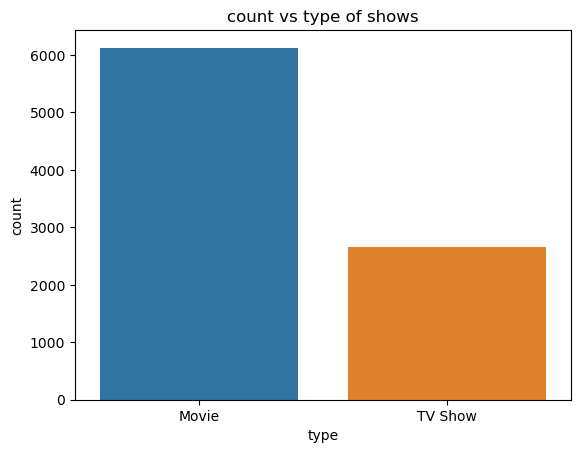

In [29]:
sns.countplot(x='type',data=df)
plt.title('count vs type of shows')

In [33]:
df['country'].value_counts().head(10)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
unavailable        287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

Text(0.5, 1.0, 'country wise content on netlfix')

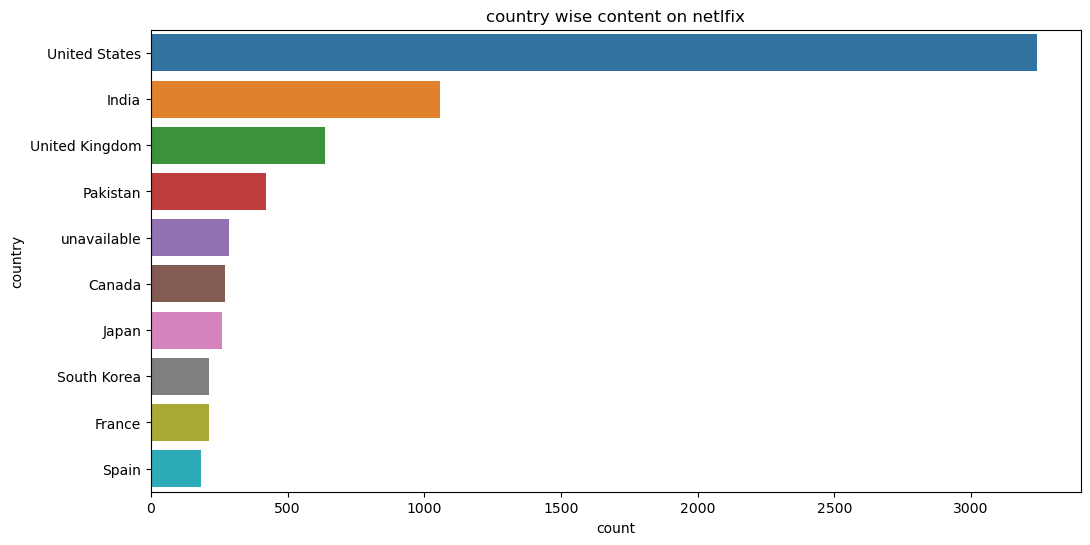

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df)
plt.title('country wise content on netlfix')

In [58]:
movie_countries=df[df['type']=='Movie']
tv_show_countries=df[df['type']=='TVshow']

Text(0.5, 1.0, 'Top 10 countires producing movies in netflix')

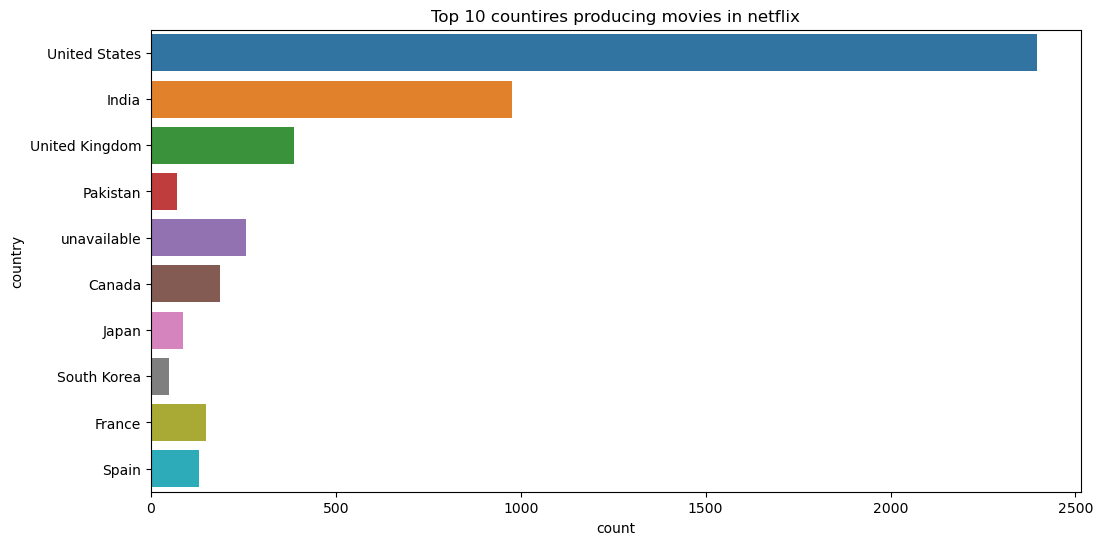

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= df['country'].value_counts().index[0:10],data = movie_countries)
plt.title('Top 10 countires producing movies in netflix')

Text(0.5, 1.0, 'Top 10 countires producing tvshows in netflix')

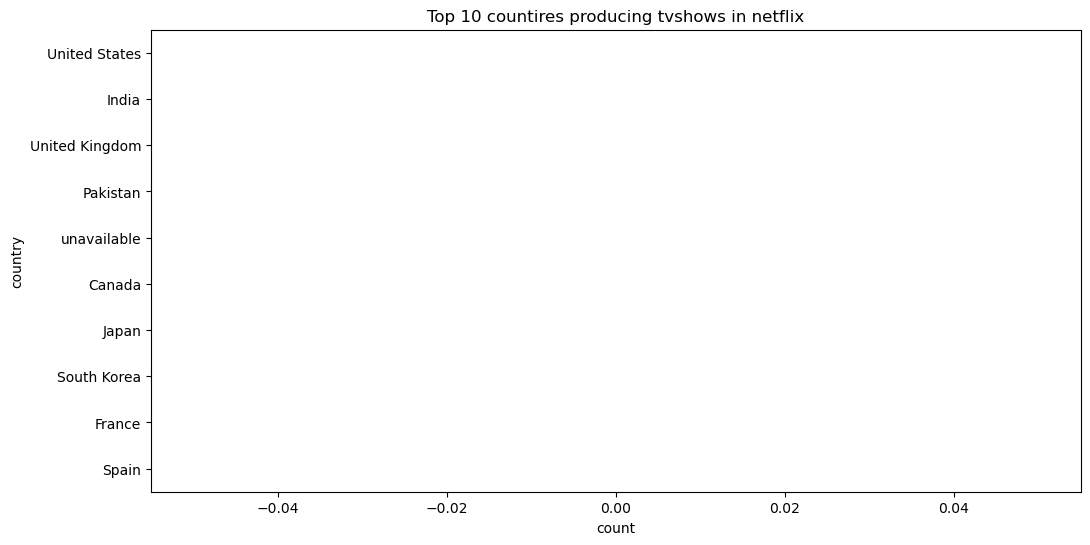

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= df['country'].value_counts().index[0:10],data = tv_show_countries)
plt.title('Top 10 countires producing tvshows in netflix')

In [46]:
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'ratings of shows on netflix vs count')

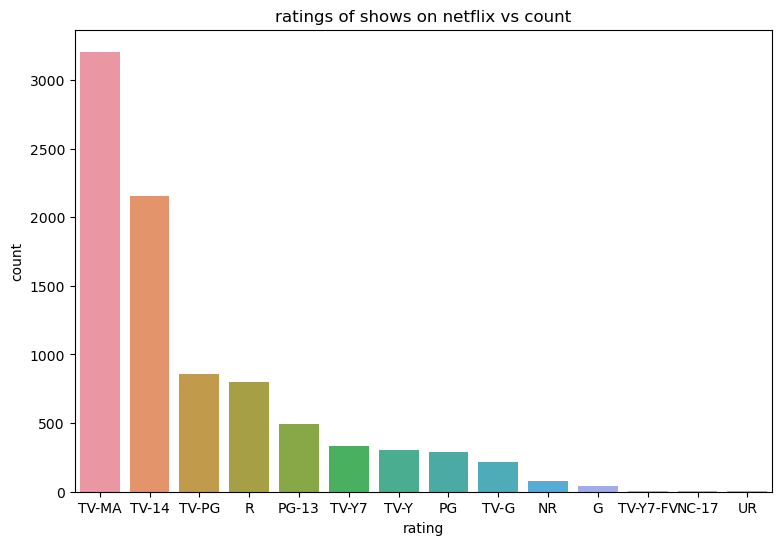

In [49]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:20],data=df)
plt.title('ratings of shows on netflix vs count')

In [50]:
df.release_year.value_counts()[:20]

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
2003      59
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'content Release in years on netflix vs content')

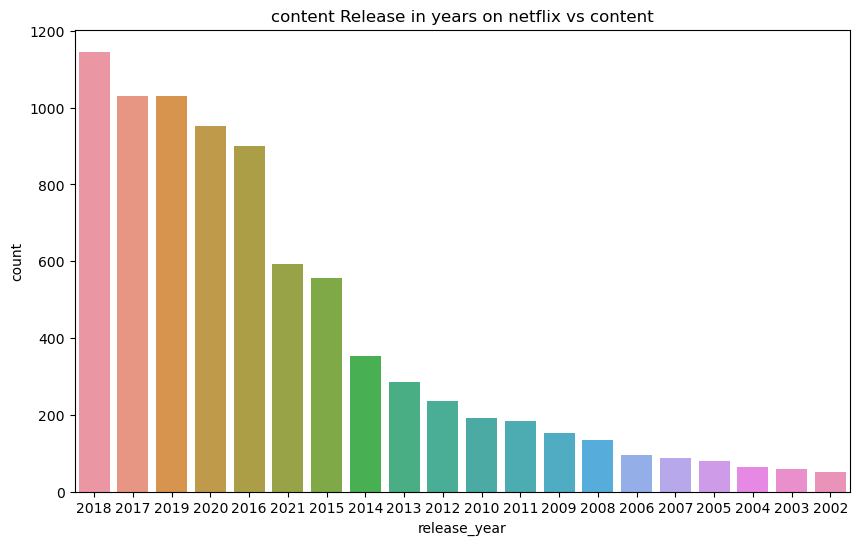

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=df)
plt.title('content Release in years on netflix vs content')

Text(0.5, 1.0, 'top 20 genres on netflix')

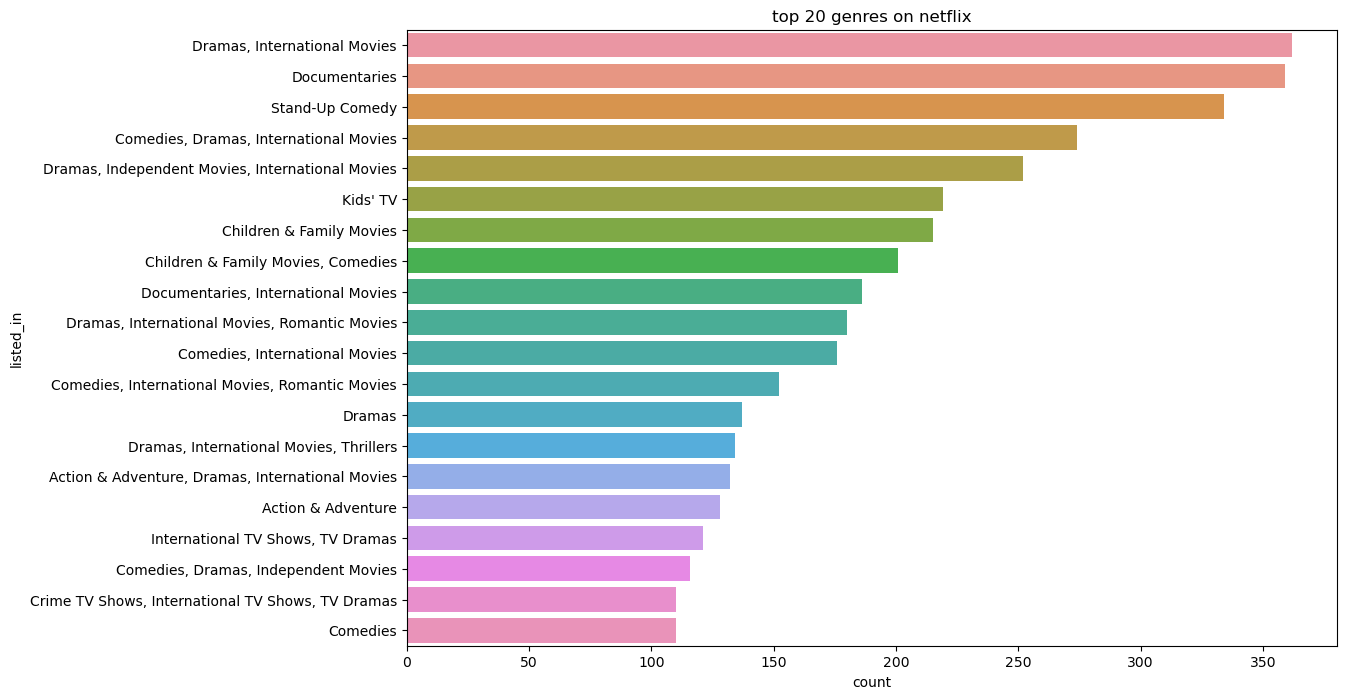

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:20],data=df)
plt.title('top 20 genres on netflix')

summary
 1.netflix has more movies than tv shows
 2.mostnumber of movies and tv shows are produced by united states,followed by india who has produced the second most number of movies on netflix
 3.most of the content on netflix(movies and tv shows combined)is for mature audiences
 4.2018 is the year in which netflix released alot more content as compared to anyother years
 5.international movies and dramasa are the most popular genres on netflix